<a href="https://colab.research.google.com/github/bkkaggle/pytorch-CycleGAN-and-pix2pix/blob/master/CycleGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Take a look at the [repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) for more information

### exploring horse 2 zebra data with the full architecture, reimplementing BAIR research paper

In [1]:
#!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

In [2]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [4]:
# !pip install -r requirements.txt

#### Dataset used here: horse2zebra

Download one of the official datasets with:

-   `bash ./datasets/download_cyclegan_dataset.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or use your own dataset by creating the appropriate folders and adding in the images.

-   Create a dataset folder under `/dataset` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder. Place any images you want to transform from a to b (cat2dog) in the `testA` folder, images you want to transform from b to a (dog2cat) in the `testB` folder, and do the same for the `trainA` and `trainB` folders.

In [3]:
# !bash ./datasets/download_cyclegan_dataset.sh horse2zebra

#### We use the pretrained model for the same, to explore reimplementation. Parameters and architecture taken are same as the Cyc-GAN paper

Download one of the official pretrained models with:

-   `bash ./scripts/download_cyclegan_model.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [4]:
!bash ./scripts/download_cyclegan_model.sh horse2zebra

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [horse2zebra]
for details.

--2020-03-12 18:47:05--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/horse2zebra.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.189.73
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.189.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/horse2zebra_pretrained/latest_net_G.pth’

./checkpoints/horse 100%[===================>]  43.46M  18.7MB/s    in 2.3s    

2020-03-12 18:47:08 (18.7 MB/s) - ‘./checkpoints/horse2zebra_pretrained/latest_net_G.pth’ saved [45575747/45575747]



# Training

-   `python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. I've found that a batch size of 16 fits onto 4 V100s and can finish training an epoch in ~90s.

Once your model has trained, copy over the last checkpoint to a format that the testing model can automatically detect:

Use `cp ./checkpoints/horse2zebra/latest_net_G_A.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class A to class B and `cp ./checkpoints/horse2zebra/latest_net_G_B.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class B to class A.


In [5]:
!python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan 
#--n_epochs 100 
# --gan_mode 'wgangp'
#--niter 100
#--gpu_ids 0,1

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/horse2zebra        	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
              



Could not connect to Visdom server. 
 Trying to start a server....
Command: /home/ubuntu/anaconda3/bin/python -m visdom.server -p 8097 &>/dev/null &
create web directory ./checkpoints/horse2zebra/web...
End of epoch 1 / 200 	 Time Taken: 51 sec
learning rate = 0.0002000
(epoch: 2, iters: 33, time: 0.787, data: 0.227) D_A: 0.365 G_A: 0.457 cycle_A: 2.602 idt_A: 1.399 D_B: 0.283 G_B: 0.354 cycle_B: 2.894 idt_B: 1.243 
End of epoch 2 / 200 	 Time Taken: 49 sec
learning rate = 0.0002000
(epoch: 3, iters: 66, time: 0.788, data: 0.001) D_A: 0.278 G_A: 0.353 cycle_A: 2.588 idt_A: 1.507 D_B: 0.291 G_B: 0.367 cycle_B: 3.203 idt_B: 1.251 
End of epoch 3 / 200 	 Time Taken: 49 sec
learning rate = 0.0002000
End of epoch 4 / 200 	 Time Taken: 49 sec
learning rate = 0.0002000
(epoch: 5, iters: 32, time: 0.787, data: 0.001) D_A: 0.306 G_A: 0.516 cycle_A: 3.083 idt_A: 1.276 D_B: 0.326 G_B: 0.148 cycle_B: 2.686 idt_B: 1.476 
saving the model at the end of epoch 5, iters 335
End of epoch 5 / 200 	 Tim

End of epoch 46 / 200 	 Time Taken: 49 sec
learning rate = 0.0002000
(epoch: 47, iters: 18, time: 0.789, data: 0.001) D_A: 2.267 G_A: 2.339 cycle_A: 1.626 idt_A: 0.748 D_B: 0.169 G_B: 0.482 cycle_B: 1.664 idt_B: 0.864 
End of epoch 47 / 200 	 Time Taken: 49 sec
learning rate = 0.0002000
(epoch: 48, iters: 51, time: 1.398, data: 0.001) D_A: 0.345 G_A: 0.294 cycle_A: 1.512 idt_A: 0.825 D_B: 0.231 G_B: 0.325 cycle_B: 1.664 idt_B: 0.634 
End of epoch 48 / 200 	 Time Taken: 50 sec
learning rate = 0.0002000
End of epoch 49 / 200 	 Time Taken: 49 sec
learning rate = 0.0002000
(epoch: 50, iters: 17, time: 0.792, data: 0.002) D_A: 0.325 G_A: 0.396 cycle_A: 1.295 idt_A: 0.802 D_B: 0.251 G_B: 0.587 cycle_B: 1.781 idt_B: 0.578 
saving the model at the end of epoch 50, iters 3350
End of epoch 50 / 200 	 Time Taken: 49 sec
learning rate = 0.0002000
(epoch: 51, iters: 50, time: 0.786, data: 0.002) D_A: 0.066 G_A: 0.554 cycle_A: 2.015 idt_A: 0.700 D_B: 0.095 G_B: 0.665 cycle_B: 1.652 idt_B: 0.787 
End

End of epoch 92 / 200 	 Time Taken: 49 sec
learning rate = 0.0002000
(epoch: 93, iters: 36, time: 0.789, data: 0.000) D_A: 0.304 G_A: 0.159 cycle_A: 1.026 idt_A: 0.878 D_B: 0.345 G_B: 0.204 cycle_B: 2.320 idt_B: 0.757 
End of epoch 93 / 200 	 Time Taken: 49 sec
learning rate = 0.0002000
End of epoch 94 / 200 	 Time Taken: 49 sec
learning rate = 0.0002000
(epoch: 95, iters: 2, time: 0.784, data: 0.001) D_A: 0.250 G_A: 0.463 cycle_A: 0.965 idt_A: 0.694 D_B: 0.042 G_B: 0.340 cycle_B: 1.352 idt_B: 0.430 
saving the model at the end of epoch 95, iters 6365
End of epoch 95 / 200 	 Time Taken: 50 sec
learning rate = 0.0002000
(epoch: 96, iters: 35, time: 1.820, data: 0.000) D_A: 0.053 G_A: 0.473 cycle_A: 0.836 idt_A: 0.442 D_B: 0.105 G_B: 0.598 cycle_B: 1.113 idt_B: 0.344 
End of epoch 96 / 200 	 Time Taken: 50 sec
learning rate = 0.0002000
End of epoch 97 / 200 	 Time Taken: 49 sec
learning rate = 0.0002000
(epoch: 98, iters: 1, time: 0.737, data: 0.002) D_A: 0.273 G_A: 0.839 cycle_A: 0.801 

(epoch: 138, iters: 21, time: 1.986, data: 0.001) D_A: 0.171 G_A: 0.244 cycle_A: 1.043 idt_A: 0.406 D_B: 0.047 G_B: 0.803 cycle_B: 1.023 idt_B: 0.621 
End of epoch 138 / 200 	 Time Taken: 50 sec
learning rate = 0.0001228
(epoch: 139, iters: 54, time: 0.789, data: 0.001) D_A: 0.123 G_A: 0.862 cycle_A: 1.181 idt_A: 0.588 D_B: 0.067 G_B: 0.620 cycle_B: 1.520 idt_B: 0.556 
End of epoch 139 / 200 	 Time Taken: 49 sec
learning rate = 0.0001208
saving the model at the end of epoch 140, iters 9380
End of epoch 140 / 200 	 Time Taken: 49 sec
learning rate = 0.0001188
(epoch: 141, iters: 20, time: 0.789, data: 0.001) D_A: 0.208 G_A: 0.543 cycle_A: 0.947 idt_A: 0.445 D_B: 0.149 G_B: 0.285 cycle_B: 0.974 idt_B: 0.418 
End of epoch 141 / 200 	 Time Taken: 49 sec
learning rate = 0.0001168
(epoch: 142, iters: 53, time: 0.789, data: 0.002) D_A: 0.210 G_A: 0.345 cycle_A: 0.793 idt_A: 0.439 D_B: 0.033 G_B: 0.489 cycle_B: 0.900 idt_B: 0.381 
End of epoch 142 / 200 	 Time Taken: 49 sec
learning rate = 0.0

(epoch: 183, iters: 6, time: 0.786, data: 0.002) D_A: 0.108 G_A: 0.511 cycle_A: 1.049 idt_A: 0.475 D_B: 0.216 G_B: 0.450 cycle_B: 0.991 idt_B: 0.504 
End of epoch 183 / 200 	 Time Taken: 49 sec
learning rate = 0.0000337
(epoch: 184, iters: 39, time: 0.790, data: 0.000) D_A: 0.120 G_A: 0.337 cycle_A: 1.095 idt_A: 0.548 D_B: 0.133 G_B: 0.330 cycle_B: 1.421 idt_B: 0.428 
End of epoch 184 / 200 	 Time Taken: 49 sec
learning rate = 0.0000317
saving the model at the end of epoch 185, iters 12395
End of epoch 185 / 200 	 Time Taken: 49 sec
learning rate = 0.0000297
(epoch: 186, iters: 5, time: 2.400, data: 0.002) D_A: 0.097 G_A: 0.641 cycle_A: 0.506 idt_A: 0.253 D_B: 0.029 G_B: 0.178 cycle_B: 0.667 idt_B: 0.225 
End of epoch 186 / 200 	 Time Taken: 50 sec
learning rate = 0.0000277
(epoch: 187, iters: 38, time: 0.790, data: 0.000) D_A: 0.301 G_A: 0.176 cycle_A: 0.994 idt_A: 0.352 D_B: 0.305 G_B: 0.505 cycle_B: 0.789 idt_B: 0.403 
End of epoch 187 / 200 	 Time Taken: 49 sec
learning rate = 0.00

### Testing

By default, we have single mode to load the images. Using --model cycle_gan will automatically load & generate the results in both directions, which is not always necessary.

Other experiments and results generated for training against our dataset include modifications or specifying --norm, --netG, dropout etc. Another implementation against the vgg content_loss instead of the standard pixel loss has been done. It can be explored in the AMI in corresponding folder & ipynb files to check its results.


> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

In [6]:
!python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/horse2zebra/testA    	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

# Visualize

In [7]:
#import file

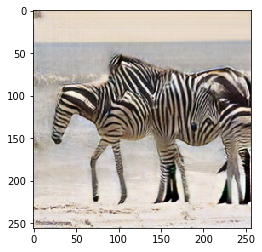

In [9]:
import matplotlib.pyplot as plt

img = plt.imread('./results/horse2zebra_pretrained/test_latest/images/n02381460_120_real.png')
plt.imshow(img)

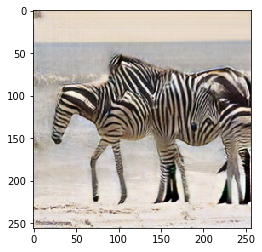

In [10]:
img = plt.imread('./results/horse2zebra_pretrained/test_latest/images/n02381460_120_fake.png')
plt.imshow(img)

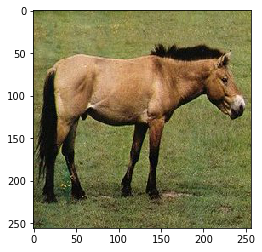

In [11]:
img = plt.imread('./results/horse2zebra_pretrained/test_latest/images/n02381460_1160_real.png')
plt.imshow(img)

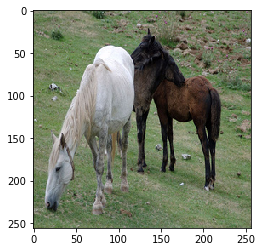

In [13]:
img = plt.imread('./results/horse2zebra_pretrained/test_latest/images/n02381460_1160_real.png')
plt.imshow(img)

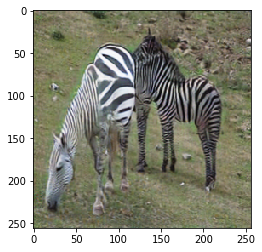

In [14]:
img = plt.imread('./results/horse2zebra_pretrained/test_latest/images/n02381460_1160_fake.png')
plt.imshow(img)